If we look at yelp data, we have ample information about different aspects of the data. Here, we look at yelp business data and make an attempt to fish out the relevant details for all restaurants/ bars in Charlotte, NC.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from textblob.classifiers import NaiveBayesClassifier
from sklearn.metrics import confusion_matrix
import re
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [0]:
import json, csv

inputFile = open('yelp_academic_dataset_business.json') #open json file
outputFile = open('business_list.csv', 'w') #load csv file
  
  
# Opening JSON file and loading the data 
# into the variable data 
data=[]
with open('yelp_academic_dataset_business.json') as json_file: 
  for line in json_file:
    data.append(json.loads(line))
 
 
# now we will open a file for writing 
data_file = open('business_list.csv', 'w') 
  
# create the csv writer object 
csv_writer = csv.writer(data_file) 
  
# Counter variable used for writing  
# headers to the CSV file 
count = 0
  
for emp in data: 
    if count == 0: 
  
        # Writing headers of CSV file 
        header = emp.keys() 
        csv_writer.writerow(header) 
        count += 1
  
    # Writing data of CSV file 
    csv_writer.writerow(emp.values()) 
  
data_file.close() 

df = pd.read_csv('business_list.csv', encoding = "ISO-8859-1")
print(df.shape)
df.head()

(192609, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",NaN
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,NaN,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [0]:
df=df[df['city']=='Phoenix']
df.shape
df=df[df['categories'].str.contains('estaurant', na=False)]

In [0]:
print(df.isna().sum(), end = '\n\n')
df[df.isnull().any(axis=1)].head()

business_id       0
name              0
address          65
city              0
state             0
postal_code       8
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
attributes       93
categories        0
hours           994
dtype: int64



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
133,ysfeDcLAYk_MVzfBmyiSTg,Vals Getaway DES Cafeteria,1789 W Jefferson,Phoenix,AZ,85007,33.446805,-112.097129,3.0,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Food, Cafes",NaN
276,c7JoAt6a3Ufkpn3TrGU23A,Santanas Mexican Food,1930 W Buckeye Rd,Phoenix,AZ,85009,33.436984,-112.101267,3.0,6,1,"{'HasTV': 'True', 'Ambience': ""{'romantic': Fa...","Mexican, Restaurants",NaN
302,e-9f6vasnWh3z0uOq287Aw,Pizza Hut,"2835 N 16th St, Ste 103",Phoenix,AZ,85006,33.479506,-112.046931,2.0,14,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Restaurants, Italian, Pizza, Fast Food, Chicke...",NaN
409,UdL8Z06DaNj6qhen0fEH9A,Mariscos El Dorado Sin,5630 S Central Ave,Phoenix,AZ,85040,33.394586,-112.073684,2.0,7,1,NaN,"Mexican, Restaurants, Seafood","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ..."
457,tylsscXmLq03-DzGI36bIA,Squaw Peak Cafe,2333 E Thomas Rd,Phoenix,AZ,85016,33.479190,-112.031488,3.5,8,1,"{'RestaurantsDelivery': 'True', 'GoodForKids':...","Restaurants, Sandwiches, Salad, Pizza",NaN


In [0]:
df['review_count'].describe()
df.shape

(4004, 14)

[Text(0, 0, 'Magic Planet'),
 Text(0, 0, 'Al Ahli Club'),
 Text(0, 0, '                     '),
 Text(0, 0, 'Flamingo Billiards'),
 Text(0, 0, 'Albarsha   Park  '),
 Text(0, 0, 'Desert Safari Dubai'),
 Text(0, 0, 'VOX Cinemas'),
 Text(0, 0, 'Springs   '),
 Text(0, 0, 'Greens Mosque'),
 Text(0, 0, 'Trader Vic s'),
 Text(0, 0, 'TECOM'),
 Text(0, 0, 'Apr  s'),
 Text(0, 0, 'Springs  '),
 Text(0, 0, 'Reel Cinemas                  '),
 Text(0, 0, 'Al Barari'),
 Text(0, 0, 'The Retreat'),
 Text(0, 0, 'Dubai Polo   Equestrian Club'),
 Text(0, 0, 'Irish Village'),
 Text(0, 0, 'Grand Cinemas                      '),
 Text(0, 0, ' M Innovation Center'),
 Text(0, 0, 'Prime Medical Center'),
 Text(0, 0, 'Novotel   World Trade Centre Dubai'),
 Text(0, 0, 'Mizhar  '),
 Text(0, 0, 'Rashid Al Hadith Mosque                               '),
 Text(0, 0, 'Ratsky Karama'),
 Text(0, 0, 'Ramadan Juma Mosque                             '),
 Text(0, 0, 'Cedre Villas Pool   Phase  '),
 Text(0, 0, 'Infiniti'),
 

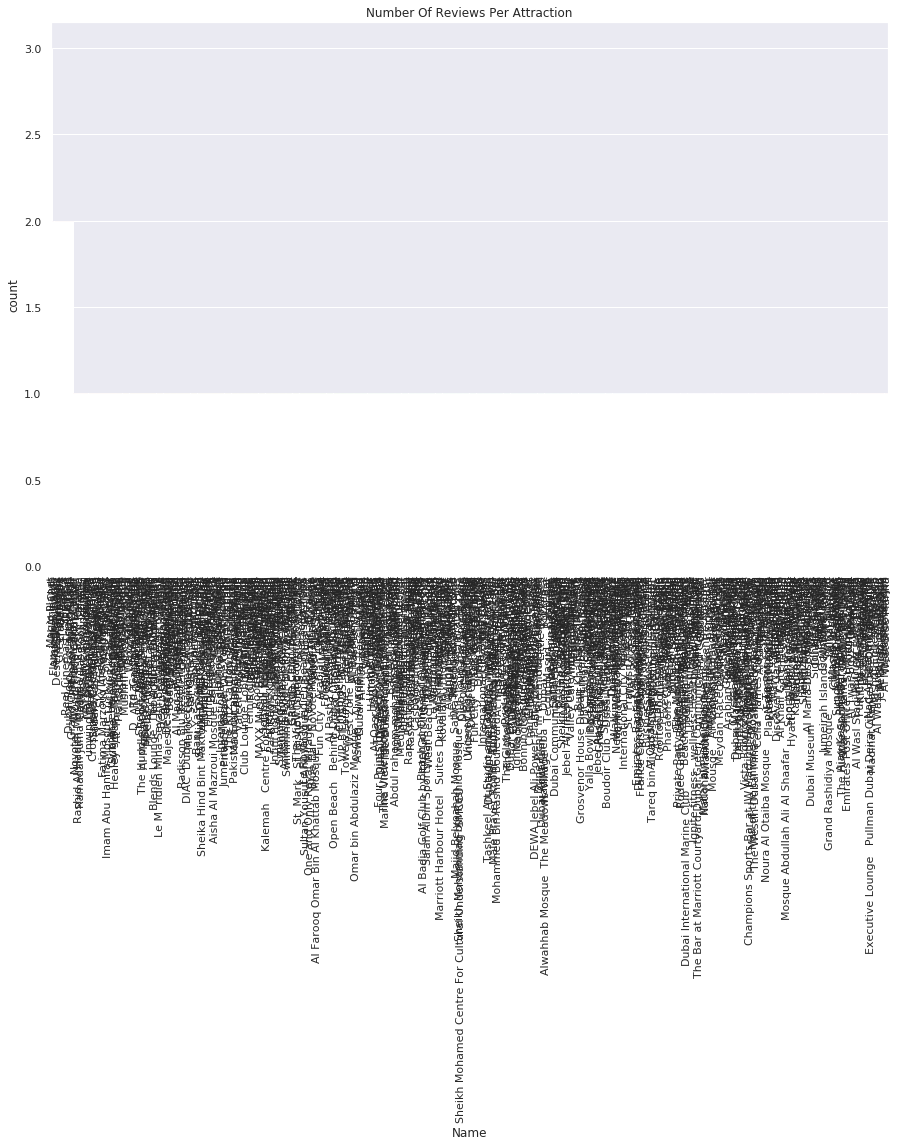

In [0]:
grid = sb.countplot(x = 'Review Rating', data = df, order = df['Review Rating'].value_counts().index)
grid.set_title('Number Of Ratings')